In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pystan
import experiments
from experiment_manager import *
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
bbexperiment = BBExperiment()
bbexperiment.setup(n_items=100, max_workers_per_item=6, skip_gran=True)

100%|██████████| 100/100 [00:01<00:00, 53.68it/s]


In [8]:
# this just tells it to hold out N items from the dataset
# so that they can be used for semisupervised learning later
nsemisupervised = int(bbexperiment.stan_data["NITEMS"] / 5)
experiments.set_supervised_items(bbexperiment, nsemisupervised)

Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5658913736283451 0.6102883392398324
t-test Ttest_relResult(statistic=-4.9759484348844385, pvalue=9.672393286584982e-07)
z-score 0.249109002857854
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5658913736283451 0.6465081205888085
t-test Ttest_relResult(statistic=-9.698640175057433, pvalue=4.1342340229261305e-20)
z-score 0.4855393126962316
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5658913736283451 0.6489002769741427
t-test Ttest_relResult(statistic=-10.254578837360093, pvalue=4.675735833417135e-22)
z-score 0.5133710572628453
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5658913736283451 0.6207624315873626
t-test Ttest_relResult(statistic=-6.610905108756007, pvalue=1.227559473868315e-10)
z-score 0.3309592133400691
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5658913736283451 0.7195274748940484
t-test 

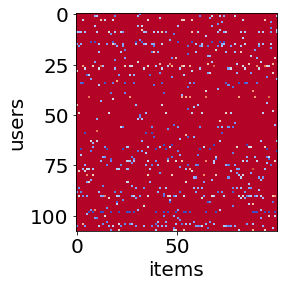

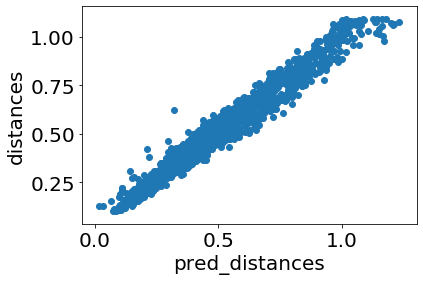

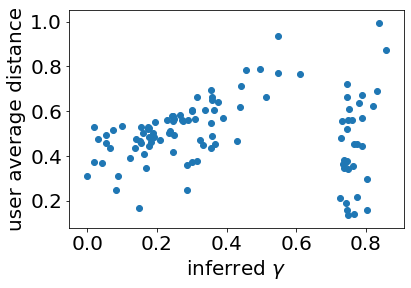

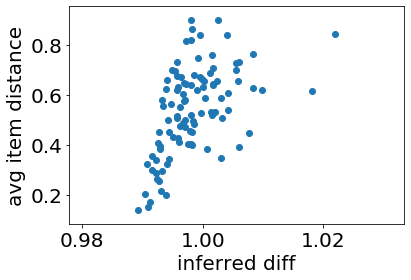

In [9]:
# first train without semisupervised learning
bbexperiment.train(dem_iter=500, mas_iter=500)
bbexperiment.test(debug=True)

100%|██████████| 100/100 [00:02<00:00, 45.29it/s]


Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5689741186790429 0.6086420875532237
t-test Ttest_relResult(statistic=-4.348525107397489, pvalue=1.742191052015289e-05)
z-score 0.21769854884585202
baseline below thresh 0.0
model below thresh 0.0
BEST HONEYPOT USER
0.5689741186790429 0.6272753533993061
t-test Ttest_relResult(statistic=-6.091138152972795, pvalue=2.639966631121791e-09)
z-score 0.3049383190788075
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5689741186790429 0.6465081205888085
t-test Ttest_relResult(statistic=-8.687726152779042, pvalue=9.639995924520558e-17)
z-score 0.43493031074208643
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5689741186790429 0.6508346856925972
t-test Ttest_relResult(statistic=-9.369866076227874, pvalue=5.457363276203939e-19)
z-score 0.469080020764919
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5689741186790429 0.6461653505170

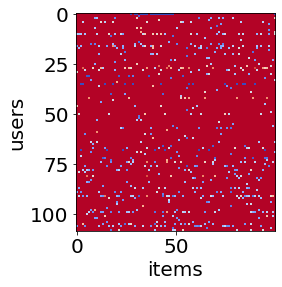

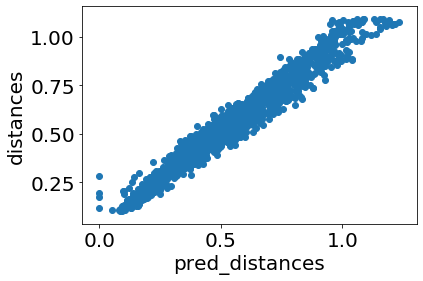

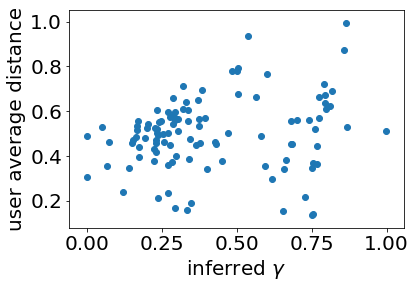

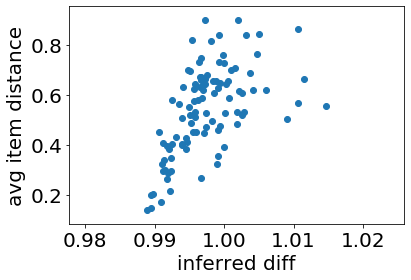

In [10]:
# now add those items back in
# (but not to the test set.. test sets must be comparable between unsup and semisup)
experiments.make_supervised_standata(bbexperiment)
bbexperiment.train(dem_iter=500, mas_iter=500)
bbexperiment.test(debug=True)